# Drosophila Gene Transcript Expression Visualization
### by Hayley Reynolds

## Project Description: 
#### FlyBase is an free online bioinformatics database and the primary repository of genetic and molecular data for Drosophilidae insect family. All data is available to access and includes mutant phenotypes, molecular characterization of mutant alleles, cytological maps, wild-type expression patterns, anatomical images, transgenic constructs and insertions, sequence-level gene models and molecular classification of gene product functions. This project is focused on parsing through the gene expression files and plotting the data in order to provide improved data visualization of expression levels under different stages of development.

## Current status of expression data visualization

### Stage
![Picture1](https://user-images.githubusercontent.com/47371170/57148481-b3783680-6d97-11e9-96de-bf4b74501a75.png)


## Step 1: Import relevant modules and define variables

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
filename = 'gene_rpkm_report_fb_2019_02.tsv'
genename = 'FBgn0003372'


![Screen Shot 2019-05-05 at 11 57 06 AM](https://user-images.githubusercontent.com/47371170/57196688-38e11f80-6f2d-11e9-844e-7f97ead30822.png)

## Step 2: Read in tsv file
### Skip rows with text
### tab delineate 

![Screen Shot 2019-05-03 at 3 58 21 PM](https://user-images.githubusercontent.com/47371170/57162472-5a6ec980-6dbc-11e9-8cf4-e5f659e85356.png)

In [16]:
df = pd.read_csv(filename, skiprows=5, sep='\t')


## Step 3: Extract desired gene expression library and columns of interest

In [17]:
df = df.drop(df[df.Parent_library_name == 'BCM_1_RNAseq'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_tissues'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_treatments'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_cell.B'].index)
df = df.drop(df[df.Parent_library_name == 'Knoblich_Neural_Cell_RNA-Seq'].index)

In [18]:
RNAseq = df[['FBgn#', 'RNASource_name', 'RPKM_value']]

## Step 4: Generate function to identify rows specific to your gene of interest

In [19]:
def find_gene(genename):
    df = RNAseq.loc[RNAseq['FBgn#'] == genename]
    return df


## Step 5: Utilize function and inspect returned data frame

In [20]:
data = find_gene(genename)
print(data.head)


<bound method NDFrame.head of              FBgn#          RNASource_name  RPKM_value
73560  FBgn0003372         mE_mRNA_em0-2hr         0.0
73561  FBgn0003372         mE_mRNA_em2-4hr         0.0
73562  FBgn0003372         mE_mRNA_em4-6hr         0.0
73563  FBgn0003372         mE_mRNA_em6-8hr         0.0
73564  FBgn0003372        mE_mRNA_em8-10hr         0.0
73565  FBgn0003372       mE_mRNA_em10-12hr         0.0
73566  FBgn0003372       mE_mRNA_em12-14hr         0.0
73567  FBgn0003372       mE_mRNA_em14-16hr         0.0
73568  FBgn0003372       mE_mRNA_em16-18hr         0.0
73569  FBgn0003372       mE_mRNA_em18-20hr         0.0
73570  FBgn0003372       mE_mRNA_em20-22hr         0.0
73571  FBgn0003372       mE_mRNA_em22-24hr         0.0
73572  FBgn0003372              mE_mRNA_L1         0.0
73573  FBgn0003372              mE_mRNA_L2         0.0
73574  FBgn0003372         mE_mRNA_L3_12hr         0.0
73575  FBgn0003372        mE_mRNA_L3_PS1-2       296.0
73576  FBgn0003372        mE_mRNA_L

## Plot data in bar plot 

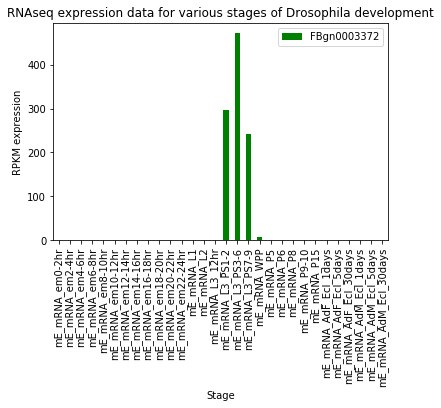

In [21]:
data.plot(kind='bar', x= 'RNASource_name', y= 'RPKM_value', color='g', label=genename)
plt.xlabel('Stage')
plt.ylabel('RPKM expression')
plt.title('RNAseq expression data for various stages of Drosophila development')
plt.show()


## Plot Data in Pie Chart

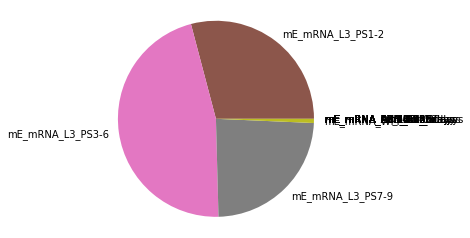

In [22]:
plt.pie(data['RPKM_value'], labels=data['RNASource_name'])
plt.axis('equal')
plt.show()

## Try new gene

In [25]:
genename='FBgn0004110'

<bound method NDFrame.head of              FBgn#          RNASource_name  RPKM_value
93146  FBgn0004110         mE_mRNA_em0-2hr         1.0
93147  FBgn0004110         mE_mRNA_em2-4hr        21.0
93148  FBgn0004110         mE_mRNA_em4-6hr        58.0
93149  FBgn0004110         mE_mRNA_em6-8hr        19.0
93150  FBgn0004110        mE_mRNA_em8-10hr         9.0
93151  FBgn0004110       mE_mRNA_em10-12hr         4.0
93152  FBgn0004110       mE_mRNA_em12-14hr         3.0
93153  FBgn0004110       mE_mRNA_em14-16hr         3.0
93154  FBgn0004110       mE_mRNA_em16-18hr         2.0
93155  FBgn0004110       mE_mRNA_em18-20hr         2.0
93156  FBgn0004110       mE_mRNA_em20-22hr         1.0
93157  FBgn0004110       mE_mRNA_em22-24hr         1.0
93158  FBgn0004110              mE_mRNA_L1         0.0
93159  FBgn0004110              mE_mRNA_L2         0.0
93160  FBgn0004110         mE_mRNA_L3_12hr         0.0
93161  FBgn0004110        mE_mRNA_L3_PS1-2         0.0
93162  FBgn0004110        mE_mRNA_L

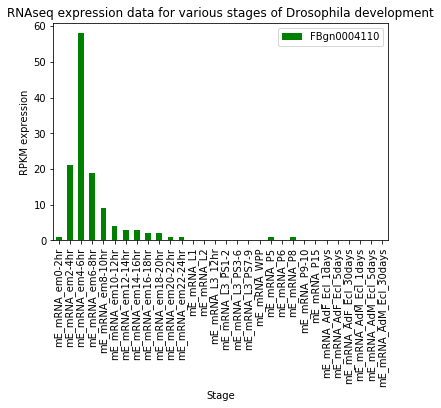

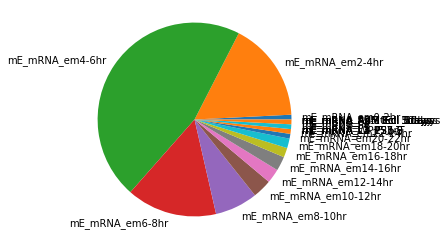

In [26]:
data = find_gene(genename)
print(data.head)

data.plot(kind='bar', x= 'RNASource_name', y= 'RPKM_value', color='g', label=genename)
plt.xlabel('Stage')
plt.ylabel('RPKM expression')
plt.title('RNAseq expression data for various stages of Drosophila development')
plt.show()

plt.pie(data['RPKM_value'], labels=data['RNASource_name'])
plt.axis('equal')
plt.show()
